### work_1208_이서범
[2025_12_08]_과제
- 다양한 생선의 품종 식별 모델
- 데이터 : fish.csv
- 데이터 증강 : 160행 => (생선품종별로 갯수 동일하게 맞추기)
                     10K행
- 필수
   * 전처리
   * 타겟과 관련성 높은 피쳐 선택
   * 모델: KNN
   * 교차 검증 진행
   * 예측에 따른 확인 작업 필수

[1] 모듈 로딩 <hr>

In [111]:
## 모듈 로딩
import pandas as pd
import numpy as np

## 시각화
import matplotlib.pyplot as plt
import koreanize_matplotlib

## KNN
from sklearn.neighbors import KNeighborsClassifier  ## 학습 알고리즘
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score, cross_validate ## 교차학습

[2] 데이터 전처리 <hr>

In [112]:
# fishDF = pd.read_csv('../DATA/fish.csv')
TestDF = pd.read_csv('../DATA/fish_test_300.csv')       ## 얘는 모델 끝에서 확인하는거임
TrainDF = pd.read_csv('../DATA/fish_train_10500.csv')

In [113]:
# 테스트용 데이터 확인
display(TestDF)
TestDF.info()
TestDF.describe()

,Weight,Length,Diagonal,Height,Width,Species
0,1019.458912,39.886242,44.914385,18.293220,6.695193,Bream
1,925.968213,39.764142,45.389824,18.762811,6.170470,Bream
2,450.085260,30.407821,35.485696,12.640213,5.016935,Bream
3,690.865711,33.079027,38.366955,15.637912,5.792057,Bream
4,415.019990,30.251028,35.358437,13.549349,4.697483,Bream
...,...,...,...,...,...,...
295,4.549913,8.895792,9.915223,1.685749,1.128019,Smelt
296,13.653641,12.727989,13.760077,2.222179,1.552141,Smelt
297,18.745953,13.941066,14.830511,2.856355,1.999658,Smelt
298,7.786362,10.984314,12.280254,1.888790,1.057972,Smelt


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Weight    300 non-null    float64
 1   Length    300 non-null    float64
 2   Diagonal  300 non-null    float64
 3   Height    300 non-null    float64
 4   Width     300 non-null    float64
 5   Species   300 non-null    object 
dtypes: float64(5), object(1)
memory usage: 14.2+ KB


,Weight,Length,Diagonal,Height,Width
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,380.921840,27.550709,30.338501,8.378632,4.157410
std,336.985061,11.254803,12.068596,3.901954,1.655417
min,0.139190,6.214970,6.707930,0.677925,0.503088
25%,117.878207,19.215893,21.430087,6.078322,3.040145
50%,256.208352,26.366470,28.591442,8.178397,4.122130
75%,627.073170,34.276921,38.283583,10.452555,5.362023
max,1406.370479,61.354436,65.335620,18.762811,9.298806


In [114]:
# 학습용 데이터 확인
display(TrainDF)
TrainDF.info()
TrainDF.describe()

,Weight,Length,Diagonal,Height,Width,Species
0,487.423341,32.423746,37.857082,14.591014,5.270922,Bream
1,990.896538,41.365270,47.308866,18.719116,7.000605,Bream
2,627.081718,33.444702,38.939902,15.463397,5.670238,Bream
3,749.382720,35.686411,41.026632,15.974293,6.036774,Bream
4,615.621949,33.527752,39.005218,15.502285,5.483102,Bream
...,...,...,...,...,...,...
10495,7.846241,11.218239,12.020720,1.999847,0.969180,Smelt
10496,14.779721,13.106611,14.385580,2.475649,1.681532,Smelt
10497,13.134528,12.383926,13.452347,2.406321,1.600787,Smelt
10498,8.098120,10.943374,12.328623,2.021163,1.080616,Smelt


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Weight    10500 non-null  float64
 1   Length    10500 non-null  float64
 2   Diagonal  10500 non-null  float64
 3   Height    10500 non-null  float64
 4   Width     10500 non-null  float64
 5   Species   10500 non-null  object 
dtypes: float64(5), object(1)
memory usage: 492.3+ KB


,Weight,Length,Diagonal,Height,Width
count,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000
mean,382.374387,27.493283,30.269284,8.382004,4.139189
std,356.871452,11.652432,12.498661,4.020338,1.737586
min,0.022947,0.337029,0.731297,0.206650,0.048801
25%,101.429476,19.301808,21.446860,5.999904,3.007157
50%,257.622011,26.315113,29.176472,8.193073,4.190599
75%,611.290132,34.507064,38.359248,10.618332,5.448763
max,2602.490537,79.486123,85.080920,22.535982,10.562539


In [115]:
TrainDF.Species = TrainDF.Species.astype('category')
TrainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Weight    10500 non-null  float64 
 1   Length    10500 non-null  float64 
 2   Diagonal  10500 non-null  float64 
 3   Height    10500 non-null  float64 
 4   Width     10500 non-null  float64 
 5   Species   10500 non-null  category
dtypes: category(1), float64(5)
memory usage: 420.9 KB


In [116]:
print(TrainDF.Species.unique())     ## 종은 총 7개
TrainDF['Species'].value_counts()   ## 종별로 데이터는 1500개씩 존재

TrainDF['Species_codes'] = TrainDF.Species.cat.codes
TrainDF

['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt']
Categories (7, object): ['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish']


,Weight,Length,Diagonal,Height,Width,Species,Species_codes
0,487.423341,32.423746,37.857082,14.591014,5.270922,Bream,0
1,990.896538,41.365270,47.308866,18.719116,7.000605,Bream,0
2,627.081718,33.444702,38.939902,15.463397,5.670238,Bream,0
3,749.382720,35.686411,41.026632,15.974293,6.036774,Bream,0
4,615.621949,33.527752,39.005218,15.502285,5.483102,Bream,0
...,...,...,...,...,...,...,...
10495,7.846241,11.218239,12.020720,1.999847,0.969180,Smelt,5
10496,14.779721,13.106611,14.385580,2.475649,1.681532,Smelt,5
10497,13.134528,12.383926,13.452347,2.406321,1.600787,Smelt,5
10498,8.098120,10.943374,12.328623,2.021163,1.080616,Smelt,5


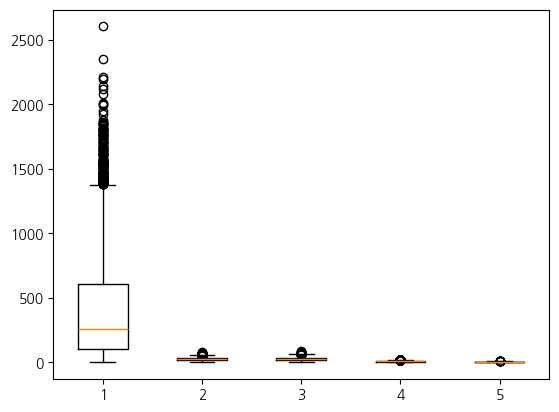

In [117]:
# 이상치 확인
plt.boxplot([TrainDF['Weight'], TrainDF['Length'], TrainDF['Diagonal'],  TrainDF['Height'], TrainDF['Width']])
plt.show()

## -> 그래도 물고기니깐 그냥 쓰는게 맞음. 크기는 다양할것으로 예상됨
## -> 스케일링 하는게 더 좋아보임

#### 관련성 높은 피쳐 선택
-> 모두 사용

In [ ]:
TrainDF.corr(numeric_only=True)
# Weight / Length / Diagonal / Height / Width
# -> 전부다 높은 상관계수를 띄고있음. 전부 쓰기

,Weight,Length,Diagonal,Height,Width,Species_codes
Weight,1.000000,0.910209,0.911204,0.654831,0.847653,-0.149398
Length,0.910209,1.000000,0.996706,0.617080,0.865005,-0.164890
Diagonal,0.911204,0.996706,1.000000,0.665658,0.876708,-0.201328
Height,0.654831,0.617080,0.665658,1.000000,0.814584,-0.528230
Width,0.847653,0.865005,0.876708,0.814584,1.000000,-0.186712
Species_codes,-0.149398,-0.164890,-0.201328,-0.528230,-0.186712,1.000000


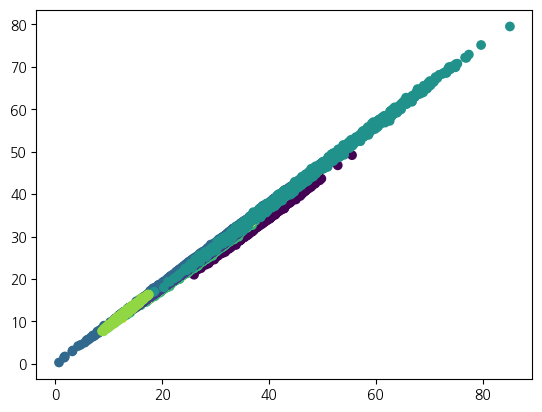

In [188]:
plt.scatter(TrainDF['Diagonal'], TrainDF['Length'], c=TrainDF['Species'].cat.codes)

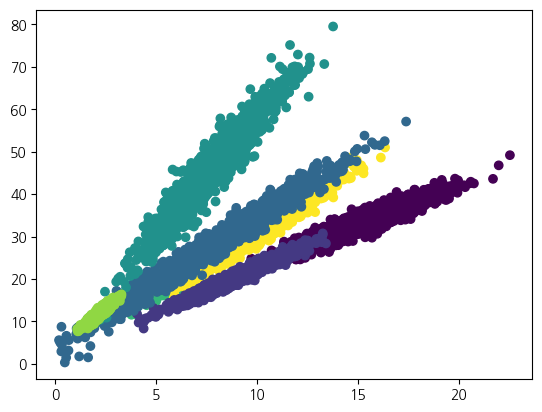

In [189]:
plt.scatter(TrainDF['Height'], TrainDF['Length'], c=TrainDF['Species'].cat.codes)

#### 정답과 학습 데이터 나누기

In [119]:
featureDF = TrainDF[TrainDF.columns[:-2]]
targetSR = TrainDF[TrainDF.columns[-2]]
display(featureDF,targetSR)

,Weight,Length,Diagonal,Height,Width
0,487.423341,32.423746,37.857082,14.591014,5.270922
1,990.896538,41.365270,47.308866,18.719116,7.000605
2,627.081718,33.444702,38.939902,15.463397,5.670238
3,749.382720,35.686411,41.026632,15.974293,6.036774
4,615.621949,33.527752,39.005218,15.502285,5.483102
...,...,...,...,...,...
10495,7.846241,11.218239,12.020720,1.999847,0.969180
10496,14.779721,13.106611,14.385580,2.475649,1.681532
10497,13.134528,12.383926,13.452347,2.406321,1.600787
10498,8.098120,10.943374,12.328623,2.021163,1.080616


0        Bream
1        Bream
2        Bream
3        Bream
4        Bream
         ...  
10495    Smelt
10496    Smelt
10497    Smelt
10498    Smelt
10499    Smelt
Name: Species, Length: 10500, dtype: category
Categories (7, object): ['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish']

#### KNN 모델 사용

In [120]:
## 학습용과 테스트용 데이터셋 분리
## x는 입력 => y는 출력 / train은 학습용 , test는 시험용
x_train, x_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    test_size=0.2,
                                                    random_state=42, ## 국룰임. -> 섞는걸 고정시키는거임
                                                    stratify=targetSR)

In [121]:
## 스케일 진행 
stdScaler = StandardScaler()
stdScaler.fit(x_train)
s_x_train = stdScaler.transform(x_train)
s_x_test = stdScaler.transform(x_test)
# print(x_train.shape)


In [ ]:
## 교차 검증 -> 데이터 프레임 만들고, sort해서 최적의 값 찾기
resultDF = pd.DataFrame(columns=['fit_time','score_time','test_score','train_score','neighbors'])

for neighbors in range(1,int(x_train.shape[0]**(1/2)+1)):
    kModel = KNeighborsClassifier(n_neighbors=neighbors)

    ## 함수 호출
    resultDict = cross_validate(kModel,                      # 사용할 모델(KNN, SVM, RF 등)
                                s_x_train,                 # 입력 데이터
                                y_train,                    # 타겟(정답)
                                return_train_score=True,     # Train 점수도 보고 싶으면 True
                                cv = 3)                      # 교차검증 폴드 수 또는 KFold 객체
                                # return_estimator=True     # 각 fold에서 학습된 모델도 보고 싶으면 True
    ret = [ resultDict[k].mean().item() for k in resultDict.keys()]
    ret.append(neighbors)
    resultDF.loc[resultDF.shape[0]] = ret

resultDF['diff'] = abs(resultDF['test_score'] - resultDF['train_score'])
resultDF

,fit_time,score_time,test_score,train_score,neighbors,diff
0,0.006019,0.011769,0.953810,1.000000,1.0,0.046190
1,0.005365,0.013479,0.950833,0.986071,2.0,0.035238
2,0.007945,0.008810,0.950000,0.977143,3.0,0.027143
3,0.002479,0.013170,0.953095,0.975655,4.0,0.022560
4,0.010346,0.014452,0.947857,0.968452,5.0,0.020595
...,...,...,...,...,...,...
86,0.006558,0.057578,0.867619,0.875179,87.0,0.007560
87,0.008028,0.054789,0.868571,0.875595,88.0,0.007024
88,0.007655,0.058046,0.865952,0.873690,89.0,0.007738
89,0.008990,0.052383,0.866905,0.874048,90.0,0.007143


In [123]:
resultDF1 = resultDF.sort_values(by=['diff','test_score','train_score'], ascending=[True, False, False]).copy()
display(resultDF1)

best_n = resultDF1.iloc[0, 4]
best_neighbor = int(best_n.item())
best_neighbor

,fit_time,score_time,test_score,train_score,neighbors,diff
61,0.007987,0.044811,0.890714,0.893869,62.0,0.003155
54,0.008421,0.042062,0.894048,0.897321,55.0,0.003274
60,0.004916,0.048550,0.890000,0.893452,61.0,0.003452
68,0.005352,0.043690,0.884167,0.887798,69.0,0.003631
57,0.007038,0.042520,0.893095,0.896726,58.0,0.003631
...,...,...,...,...,...,...
4,0.010346,0.014452,0.947857,0.968452,5.0,0.020595
3,0.002479,0.013170,0.953095,0.975655,4.0,0.022560
2,0.007945,0.008810,0.950000,0.977143,3.0,0.027143
1,0.005365,0.013479,0.950833,0.986071,2.0,0.035238


62

#### 최적의 neighbors 기반으로 모델 생성

In [124]:
# 모델 생성
kModel = KNeighborsClassifier(n_neighbors=best_neighbor)

# 모델 학습
kModel.fit(s_x_train, y_train)

# 모델 검증
kModel.score(s_x_test, y_test)

0.9057142857142857

#### 생성된 모델로 test 진행

In [180]:
# 피처/타겟 분리
X_test = TestDF[['Weight', 'Length', 'Diagonal', 'Height', 'Width']]
y_test = TestDF['Species'] 

# 무작위로 일부 샘플만 뽑아서 확
sample_idx = np.random.choice(X_test.index, size=5)
# print(sample_idx)
X_sample = X_test.loc[sample_idx]
# print(X_sample)
y_true   = y_test.loc[sample_idx] ## 확인용

# 스케일 적용
X_sample_scaled = stdScaler.transform(X_sample)

# 예측
y_pred = kModel.predict(X_sample_scaled)

print("=== 예측 확인 ===")
print("실제 라벨(y_true): ", list(y_true.values))
print("예측 라벨(y_pred):", list(y_pred))


=== 예측 확인 ===
실제 라벨(y_true):  ['Roach', 'Whitefish', 'Perch', 'Parkki', 'Whitefish']
예측 라벨(y_pred): ['Roach', 'Whitefish', 'Whitefish', 'Parkki', 'Whitefish']


In [186]:
proba_list = []

for i in range(10):
    Size = 10
    p = []
    sample_idx = np.random.choice(X_test.index, size=Size)
    X_sample = X_test.loc[sample_idx]
    y_true   = y_test.loc[sample_idx] ## 확인용

    # 스케일 적용
    X_sample_scaled = stdScaler.transform(X_sample)

    # 예측
    y_pred = kModel.predict(X_sample_scaled)

    print("=== 예측 확인 ===")
    print("실제 라벨(y_true): ", list(y_true.values))
    print("예측 라벨(y_pred):", list(y_pred))

    for idx, value in enumerate(list(y_true.values)):
        if list(y_pred)[idx] == value:
            p.append(1)
    proba_list.append(sum(p) / Size)
    print(f'{i}번째 확률 : {proba_list[-1]*100}%')

# 확률 평균 계산
proba_mean = np.mean(proba_list)

print("=== 10개 샘플 기반 평균 확률 ===")
print(f"{proba_mean*100}%")


=== 예측 확인 ===
실제 라벨(y_true):  ['Parkki', 'Parkki', 'Pike', 'Parkki', 'Whitefish', 'Smelt', 'Perch', 'Pike', 'Roach', 'Pike']
예측 라벨(y_pred): ['Parkki', 'Parkki', 'Pike', 'Parkki', 'Whitefish', 'Smelt', 'Roach', 'Pike', 'Roach', 'Pike']
0번째 확률 : 90.0%
=== 예측 확인 ===
실제 라벨(y_true):  ['Parkki', 'Parkki', 'Parkki', 'Bream', 'Perch', 'Parkki', 'Parkki', 'Smelt', 'Smelt', 'Smelt']
예측 라벨(y_pred): ['Parkki', 'Parkki', 'Parkki', 'Bream', 'Perch', 'Parkki', 'Parkki', 'Smelt', 'Smelt', 'Smelt']
1번째 확률 : 100.0%
=== 예측 확인 ===
실제 라벨(y_true):  ['Smelt', 'Roach', 'Bream', 'Smelt', 'Roach', 'Smelt', 'Whitefish', 'Parkki', 'Roach', 'Perch']
예측 라벨(y_pred): ['Smelt', 'Roach', 'Bream', 'Smelt', 'Roach', 'Smelt', 'Roach', 'Parkki', 'Roach', 'Perch']
2번째 확률 : 90.0%
=== 예측 확인 ===
실제 라벨(y_true):  ['Parkki', 'Smelt', 'Pike', 'Parkki', 'Pike', 'Whitefish', 'Perch', 'Roach', 'Bream', 'Roach']
예측 라벨(y_pred): ['Parkki', 'Smelt', 'Pike', 'Parkki', 'Pike', 'Whitefish', 'Perch', 'Roach', 'Bream', 'Roach']
3번째 확률 : 100.0

In [ ]:
# # 피처/타겟 분리
# X_test = TestDF[['Weight', 'Length', 'Diagonal', 'Height', 'Width']]
# y_test = TestDF['Species'] 

# # 무작위로 일부 샘플만 뽑아서 확
# sample_idx = np.random.choice(X_test.index, size=5)
# # print(sample_idx)
# X_sample = X_test.loc[sample_idx]
# # print(X_sample)
# y_true   = y_test.loc[sample_idx] ## 확인용

# # 스케일 적용
# X_sample_scaled = stdScaler.transform(X_sample)

# # 예측
# y_pred = kModel.predict_proba(X_sample_scaled)
# print(y_pred)

# print("=== 예측 확인 ===")
# print("실제 라벨(y_true): ", list(y_true.values))
# print("예측 라벨(y_pred):", list(y_pred))


[[1.         0.         0.         0.         0.         0.
  0.        ]
 [1.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.0483871  0.         0.62903226 0.
  0.32258065]
 [1.         0.         0.         0.         0.         0.
  0.        ]
 [0.         1.         0.         0.         0.         0.
  0.        ]]
=== 예측 확인 ===
실제 라벨(y_true):  ['Bream', 'Bream', 'Roach', 'Bream', 'Parkki']
예측 라벨(y_pred): [array([1., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0.]), array([0.        , 0.        , 0.0483871 , 0.        , 0.62903226,
       0.        , 0.32258065]), array([1., 0., 0., 0., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0.])]
